<a href="https://colab.research.google.com/github/SiThuTun22/ML-Projects/blob/main/faceMaskDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle In Colab

In [ ]:
!pip install kaggle

Upload Kaggle.json


In [ ]:
from google.colab import files
files.upload()  # select your kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sithutungraki","key":"33d8c49dcaadf3bbb5efd43a75da69b8"}'}

Move it to the proper directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download the dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:00<00:00, 342MB/s]
100% 163M/163M [00:00<00:00, 387MB/s]


Unzip the dataset

In [ ]:
!unzip face-mask-dataset.zip -d /content/face-mask-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3297.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3298.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3299.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_33.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_330.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3300.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3301.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3302.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3303.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3304.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3305.jpg  
  inflating: /content/face-mask-dataset/data/with_mask/with_mask_3306.jpg  
  inflating: /content/face-mask-dataset/

Check your dataset path

In [ ]:
import os
data_path = "/content/face-mask-dataset"
print(os.listdir(data_path))

['data']


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2700.jpg', 'with_mask_3659.jpg', 'with_mask_2071.jpg', 'with_mask_928.jpg', 'with_mask_1027.jpg']
['with_mask_2.jpg', 'with_mask_1315.jpg', 'with_mask_2568.jpg', 'with_mask_803.jpg', 'with_mask_2765.jpg']


In [ ]:
without_mask_files = os.listdir('/content/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2790.jpg', 'without_mask_1479.jpg', 'without_mask_1984.jpg', 'without_mask_2843.jpg', 'without_mask_503.jpg']
['without_mask_1069.jpg', 'without_mask_930.jpg', 'without_mask_2335.jpg', 'without_mask_2988.jpg', 'without_mask_1346.jpg']


In [ ]:
print('Number of with images:',len(with_mask_files))
print("Number of without mask images:",len(without_mask_files))

Number of with images: 3725
Number of without mask images: 3828


**Creating labels for the two class of Image**

with mask -> 1
without mask -> 0

In [ ]:
#create the labels
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

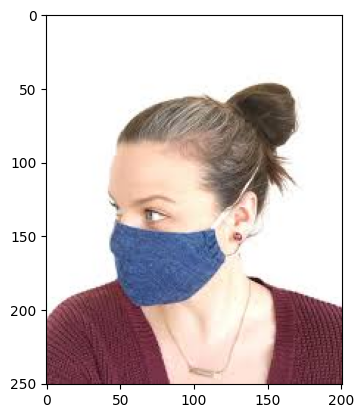

In [ ]:
#displaying with mask image
img = mpimg.imread("/content/face-mask-dataset/data/with_mask/with_mask_2666.jpg")
imgplot = plt.imshow(img)
plt.show()

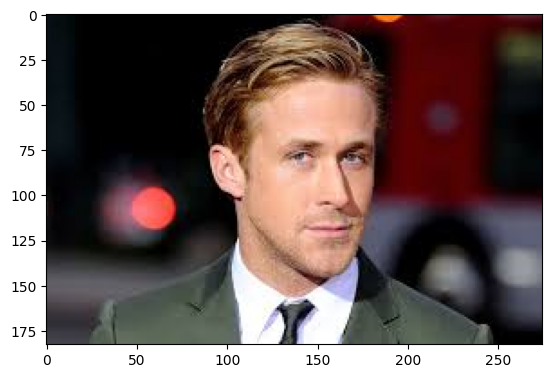

In [ ]:
without_img = mpimg.imread("/content/face-mask-dataset/data/without_mask/without_mask_2666.jpg")
without_imgplot = plt.imshow(without_img)
plt.show()

**Image Processing**


1. Resize the Images
2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays
with_mask_path = "/content/face-mask-dataset/data/with_mask/"
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/face-mask-dataset/data/without_mask/"
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[223, 222, 223],
        [227, 224, 225],
        [232, 229, 229],
        ...,
        [ 28,  21,  33],
        [ 36,  27,  33],
        [ 49,  40,  39]],

       [[223, 222, 223],
        [227, 224, 225],
        [232, 229, 229],
        ...,
        [107,  86,  65],
        [ 81,  65,  53],
        [ 67,  60,  60]],

       [[223, 222, 223],
        [227, 224, 225],
        [232, 228, 229],
        ...,
        [190, 154, 104],
        [142, 119,  92],
        [105, 100, 103]],

       ...,

       [[ 36,  30,  32],
        [ 36,  30,  32],
        [ 36,  30,  32],
        ...,
        [117, 109, 107],
        [113, 106, 104],
        [109, 104, 101]],

       [[ 34,  28,  30],
        [ 34,  28,  30],
        [ 34,  28,  30],
        ...,
        [115, 107, 105],
        [111, 105, 102],
        [109, 104, 101]],

       [[ 32,  26,  28],
        [ 32,  26,  28],
        [ 32,  26,  28],
        ...,
        [113, 105, 103],
        [110, 103, 101],
        [108, 103, 100]]], dtype=uint8)
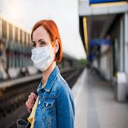

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
print(y.shape)

(7553,)


Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.2,random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.07843137 0.08235294 0.15294118]
  [0.05882353 0.0627451  0.13333333]
  [0.08235294 0.08627451 0.15686275]
  ...
  [0.09411765 0.09803922 0.16862745]
  [0.0745098  0.07843137 0.14901961]
  [0.07058824 0.0745098  0.14509804]]

 [[0.05882353 0.0627451  0.13333333]
  [0.05490196 0.05882353 0.12941176]


**Building a convolutional neural networkk**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
# model = keras.Sequential()
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(keras.layers.Dropout(0.25))

# model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128,activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.5))

# model.add(keras.layers.Dense(64,activation="relu"))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.5))

# model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pretrained MobileNetV2, exclude top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # freeze base layers

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_of_classes, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['acc'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#compile the neural network
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=['acc'])
# model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_scaled)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss")

In [ ]:
#training the neural network
history = model.fit(X_train_scaled,y_train,batch_size=32,validation_data=(X_test_scaled, y_test),epochs = 50,callbacks=[es, mc])

Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - acc: 0.9237 - loss: 0.1901 - val_acc: 0.9835 - val_loss: 0.0416
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - acc: 0.9799 - loss: 0.0563 - val_acc: 0.9894 - val_loss: 0.0298
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9885 - loss: 0.0363 - val_acc: 0.9868 - val_loss: 0.0320
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9918 - loss: 0.0274 - val_acc: 0.9881 - val_loss: 0.0314
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9937 - loss: 0.0231 - val_acc: 0.9881 - val_loss: 0.0326
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9946 - loss: 0.0149 - val_acc: 0.9861 - val_loss: 0.0372
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9964 - loss: 0.0118 - val_acc: 0.9874 - val_loss: 0.0345


**Model Evaluation**

In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print("Test Accuracy = ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9917 - loss: 0.0283
Test Accuracy =  0.9894109964370728


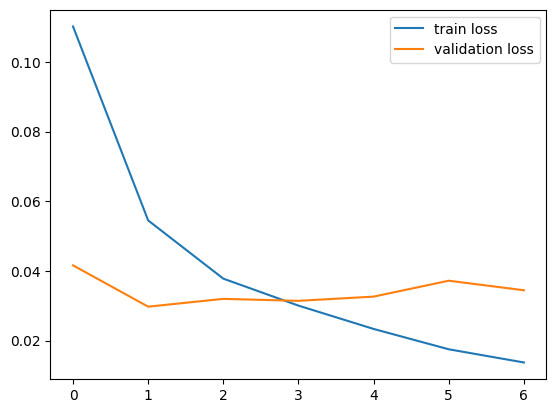

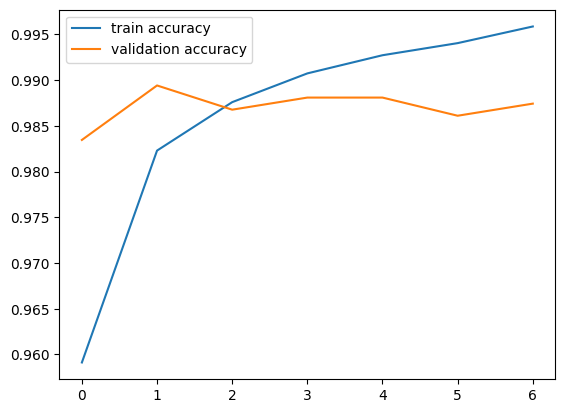

In [ ]:
h = history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label="validation accuracy")
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/images (1).jpeg


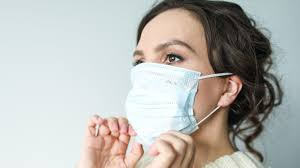

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[2.3757116e-04 9.9976248e-01]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if  input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")

Path of the image to be predicted: /content/images (2).jpeg


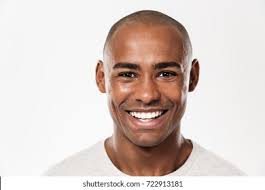

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[9.99896049e-01 1.03960236e-04]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")

Path of the image to be predicted: /content/images (3).jpeg


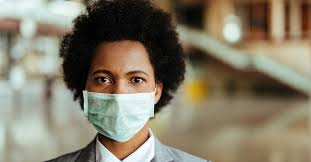

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[5.1659503e-05 9.9994838e-01]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")

Path of the image to be predicted: /content/475859277_2407089439632426_2583385036362235076_n.jpg


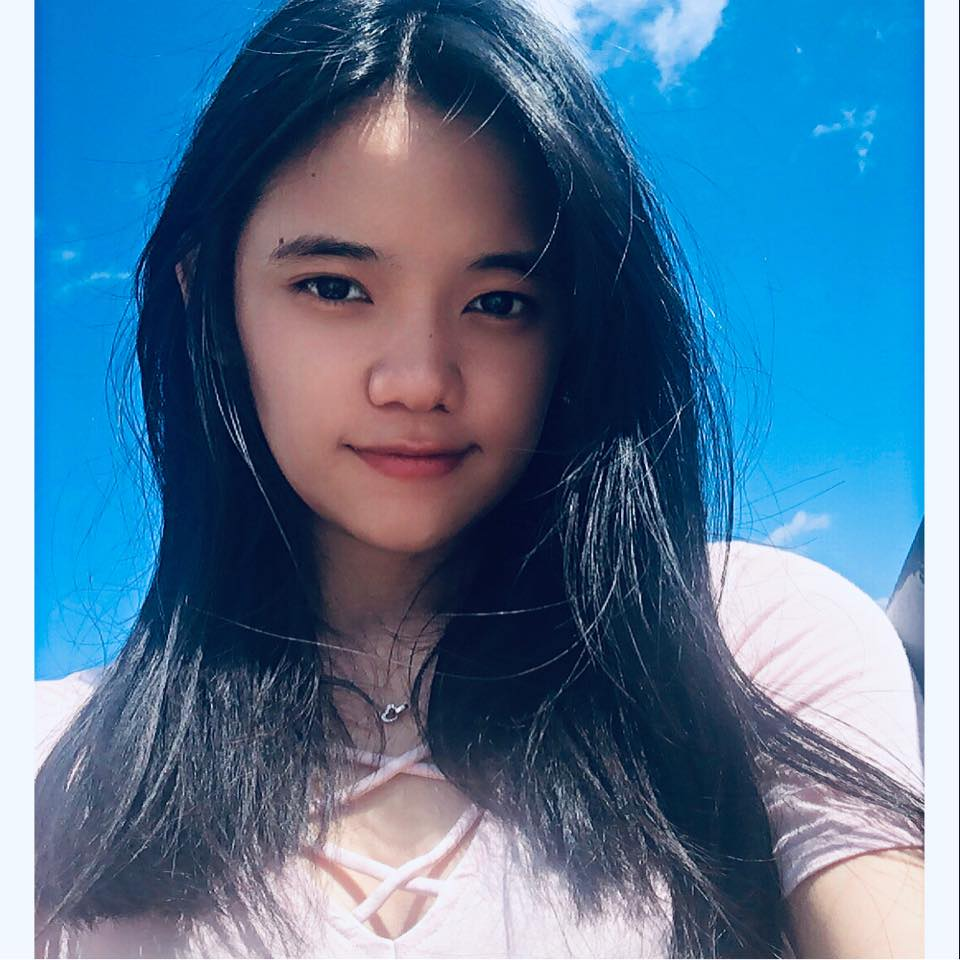

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.9978878  0.00211224]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")

In [ ]:
model.save("mask_detector_model.h5")